# Security Correlation and Regression Project

#### Importing required libraries

In [2]:
import pandas_datareader as pdr
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import datetime as dt
import pprint

In [3]:
#import plotly for heatmap
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as grph

In [4]:
#import linear model from sklearn
from sklearn import linear_model
#import MSE from SKLEARN
from sklearn.metrics import mean_squared_error

##### Setting terms of date range

In [5]:
start_date = dt.datetime(2018,1,1)

In [6]:
end_date = dt.datetime(2018,12,31)

### Getting stocks data into a dictionary

In [7]:
dict_stocks = {'Bank of America': pdr.DataReader('BAC', 'yahoo', start_date, end_date),
              'Citigroup': pdr.DataReader('C', 'yahoo', start_date, end_date),
              'Wells Fargo': pdr.DataReader('WFC', 'yahoo', start_date, end_date),
              'Goldman Sachs':pdr.DataReader('GS', 'yahoo', start_date, end_date),
              'Morgan Stanley':pdr.DataReader('MS', 'yahoo', start_date, end_date),
              'Blackrock': pdr.DataReader('BLK', 'yahoo', start_date, end_date),
              'Bank of New York': pdr.DataReader('BK', 'yahoo', start_date, end_date),
              'Visa':pdr.DataReader('V', 'yahoo', start_date, end_date), 
              'Mastercard': pdr.DataReader('MA', 'yahoo', start_date, end_date),
              'Capital One': pdr.DataReader('COF', 'yahoo', start_date, end_date),
              'General Electric':pdr.DataReader('GE', 'yahoo', start_date, end_date),
              'John Deere': pdr.DataReader('DE', 'yahoo', start_date, end_date),
              'General Motors': pdr.DataReader('GM', 'yahoo', start_date, end_date),
              'IBM': pdr.DataReader('IBM', 'yahoo', start_date, end_date),
              'Microsoft': pdr.DataReader('MSFT', 'yahoo', start_date, end_date),
              'Apple': pdr.DataReader('AAPL', 'yahoo', start_date, end_date),
              'Amazon': pdr.DataReader('AMZN', 'yahoo', start_date, end_date),
              'Google': pdr.DataReader('GOOG', 'yahoo', start_date, end_date),
              'E*Trade': pdr.DataReader('ETFC', 'yahoo', start_date, end_date),
              'Chales Schwab': pdr.DataReader('SCHW', 'yahoo', start_date, end_date),
              'Caterpillar': pdr.DataReader('CAT', 'yahoo', start_date, end_date),
              'ExxonMobil': pdr.DataReader('XOM', 'yahoo', start_date, end_date),
              'Nike': pdr.DataReader('NKE', 'yahoo', start_date, end_date),
              '3M': pdr.DataReader('MMM', 'yahoo', start_date, end_date),
              'Limited Brands': pdr.DataReader('LB', 'yahoo', start_date, end_date),
              'The Gap': pdr.DataReader('GPS', 'yahoo', start_date, end_date),
              'Abercrombie & Fitch': pdr.DataReader('ANF', 'yahoo', start_date, end_date),
              'Under Armour': pdr.DataReader('UA', 'yahoo', start_date, end_date),
              'Merck': pdr.DataReader('MRK', 'yahoo', start_date, end_date),
              'GS Access Inv Grd Corp Bd ETF': pdr.DataReader('GIGB', 'yahoo', start_date, end_date)
              }

In [8]:
dict_stocks

{'Bank of America':                  High        Low       Open      Close       Volume  Adj Close
 Date                                                                          
 2018-01-02  29.900000  29.610001  29.750000  29.900000   57121600.0  28.707111
 2018-01-03  29.940001  29.690001  29.900000  29.799999   57865700.0  28.611095
 2018-01-04  30.440001  29.879999  29.969999  30.190001   76512500.0  28.985540
 2018-01-05  30.420000  30.049999  30.370001  30.330000   56445200.0  29.119955
 2018-01-08  30.270000  30.049999  30.230000  30.120001   42914800.0  28.918331
 ...               ...        ...        ...        ...          ...        ...
 2018-12-24  23.209999  22.660000  22.760000  22.730000   64859100.0  22.224386
 2018-12-26  24.180000  22.690001  22.910000  24.110001  100877800.0  23.573690
 2018-12-27  24.370001  23.389999  23.780001  24.370001   91575400.0  23.827906
 2018-12-28  24.750000  24.260000  24.590000  24.389999   78693800.0  23.847462
 2018-12-31  24.96999

### Create DataFrame for % daily change stocks

In [9]:
df_delta = pd.DataFrame()
for i in dict_stocks:
    df_delta[i] = (dict_stocks[i].Close - dict_stocks[i].Open)/dict_stocks[i].Open
    

In [10]:
df_delta

,Bank of America,Citigroup,Wells Fargo,Goldman Sachs,Morgan Stanley,Blackrock,Bank of New York,Visa,Mastercard,Capital One,...,Caterpillar,ExxonMobil,Nike,3M,Limited Brands,The Gap,Abercrombie & Fitch,Under Armour,Merck,GS Access Inv Grd Corp Bd ETF
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.005042,-0.009722,0.000819,-0.008147,-0.010804,-0.018910,-0.008292,-0.000524,-0.000658,-0.004696,...,-0.007960,0.014436,0.010183,-0.000594,-0.022204,-0.008199,0.031746,0.038662,-0.006538,-0.001497
2018-01-03,-0.003344,0.003228,0.005554,-0.008572,0.000574,0.011167,0.004266,0.006090,0.010047,-0.000603,...,0.001528,0.018084,0.000000,0.002382,-0.030990,-0.026702,0.012568,0.030780,-0.001601,0.000400
2018-01-04,0.007341,0.006666,0.005647,0.006269,0.006250,0.008964,0.005886,-0.001462,0.008218,0.010562,...,0.009817,0.000346,0.000631,0.007215,-0.018098,0.000917,-0.011407,0.021468,0.010808,0.000000
2018-01-05,-0.001317,-0.003962,-0.000159,-0.006455,-0.001692,0.003264,-0.000365,0.015984,0.018182,-0.001477,...,0.010608,0.000000,0.004396,0.008045,-0.015060,-0.006107,0.004396,-0.001356,-0.006970,-0.000320
2018-01-08,-0.003639,-0.008514,-0.009895,-0.011541,-0.000756,0.010593,0.003463,0.006155,0.004351,-0.006113,...,0.011699,0.005075,0.006235,0.001713,-0.028948,-0.016144,-0.005432,0.006127,-0.009614,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.001318,-0.002834,-0.019564,-0.016667,-0.015953,-0.009202,0.005197,-0.002867,0.008663,-0.007015,...,-0.010324,-0.020338,-0.046219,-0.017978,0.002855,0.004886,0.025000,-0.002626,-0.019027,-0.003067
2018-12-26,0.052379,0.036052,0.039918,0.037771,0.054185,0.046559,0.033819,0.058608,0.059261,0.047291,...,0.057288,0.037171,0.062737,0.038354,0.059968,0.041969,0.095622,0.064262,0.042694,-0.002947
2018-12-27,0.024811,0.022718,0.018113,0.033038,0.030665,0.029822,0.031050,0.031409,0.025601,0.025715,...,0.039984,0.017715,0.020643,0.039237,0.010457,0.023493,0.033780,0.015625,0.028657,-0.000106


##### Save file to CSV

In [11]:
df_delta.to_csv('stock_price_daily_change.csv', index = False)

### Correlation Matrix

In [12]:
corrmatrix = df_delta.corr()

In [13]:
corrmatrix

,Bank of America,Citigroup,Wells Fargo,Goldman Sachs,Morgan Stanley,Blackrock,Bank of New York,Visa,Mastercard,Capital One,...,Caterpillar,ExxonMobil,Nike,3M,Limited Brands,The Gap,Abercrombie & Fitch,Under Armour,Merck,GS Access Inv Grd Corp Bd ETF
Bank of America,1.000000,0.879016,0.755171,0.768294,0.851657,0.752980,0.751351,0.599007,0.566715,0.799494,...,0.573458,0.448214,0.480442,0.601283,0.331795,0.311899,0.310882,0.370590,0.390603,-0.172041
Citigroup,0.879016,1.000000,0.728715,0.789381,0.828001,0.739089,0.717228,0.593734,0.571945,0.769581,...,0.588597,0.479076,0.489836,0.636088,0.367224,0.347168,0.309520,0.374234,0.443547,-0.159865
Wells Fargo,0.755171,0.728715,1.000000,0.633269,0.696398,0.658609,0.640674,0.470202,0.421802,0.721644,...,0.483813,0.426550,0.413638,0.528231,0.289306,0.273739,0.212714,0.367902,0.417799,-0.181090
Goldman Sachs,0.768294,0.789381,0.633269,1.000000,0.835826,0.684741,0.617383,0.598592,0.559294,0.738542,...,0.600826,0.451933,0.498404,0.654917,0.384238,0.305432,0.311008,0.350658,0.472976,-0.071205
Morgan Stanley,0.851657,0.828001,0.696398,0.835826,1.000000,0.794893,0.738231,0.608779,0.587154,0.798853,...,0.634255,0.471521,0.538135,0.674821,0.383404,0.351926,0.282063,0.385984,0.432563,-0.155835
Blackrock,0.752980,0.739089,0.658609,0.684741,0.794893,1.000000,0.702841,0.657441,0.614084,0.748222,...,0.681065,0.504029,0.554852,0.672595,0.358055,0.353931,0.300110,0.374298,0.482380,-0.099957
Bank of New York,0.751351,0.717228,0.640674,0.617383,0.738231,0.702841,1.000000,0.489437,0.445664,0.727083,...,0.575121,0.449763,0.389721,0.589899,0.377285,0.316709,0.303079,0.297795,0.418716,-0.159926
Visa,0.599007,0.593734,0.470202,0.598592,0.608779,0.657441,0.489437,1.000000,0.911933,0.611713,...,0.653208,0.426038,0.634243,0.594184,0.289323,0.307107,0.339495,0.446711,0.446671,-0.042007
Mastercard,0.566715,0.571945,0.421802,0.559294,0.587154,0.614084,0.445664,0.911933,1.000000,0.594076,...,0.585877,0.373280,0.606913,0.554409,0.297898,0.325122,0.341145,0.416840,0.370548,-0.034166
Capital One,0.799494,0.769581,0.721644,0.738542,0.798853,0.748222,0.727083,0.611713,0.594076,1.000000,...,0.602304,0.477670,0.549245,0.619161,0.430662,0.389786,0.323687,0.406516,0.500293,-0.102564


### Find the best direct and inverse correlation

In [14]:
stocks = []
for i in corrmatrix:
    stocks.append(i)
    
dir_stock1 = ''
dir_stock2= ''
dir_corr = 0
inv_stock1 = ''
inv_stock2= ''
inv_corr = 0
num = len(corrmatrix)

for i in range (0, num):
    for j in range (0, num):
        if corrmatrix[stocks[i]][j] ==1:
            continue
        if corrmatrix[stocks[i]][j] > dir_corr:
            dir_corr = corrmatrix[stocks[i]][j]
            dir_stock1 = stocks[i]
            dir_stock2 = stocks[j]
        if corrmatrix[stocks[i]][j] < inv_corr:
            inv_corr = corrmatrix[stocks[i]][j]
            inv_stock1 = stocks[i]
            inv_stock2 = stocks[j]
            
print("The most direct correlation is between "+str(dir_stock1)+" and"+" "+str(dir_stock2)+":")
print("with a correlation of "+str(dir_corr))
print("The most inverse correlation is between "+str(inv_stock1)+" and"+" "+str(inv_stock2)+":")
print("with a correlation of "+str(inv_corr))           

The most direct correlation is between Visa and Mastercard:
with a correlation of 0.911932938423409
The most inverse correlation is between Wells Fargo and GS Access Inv Grd Corp Bd ETF:
with a correlation of -0.1810903432398075


### Correlation Heatmap

In [15]:
%matplotlib inline

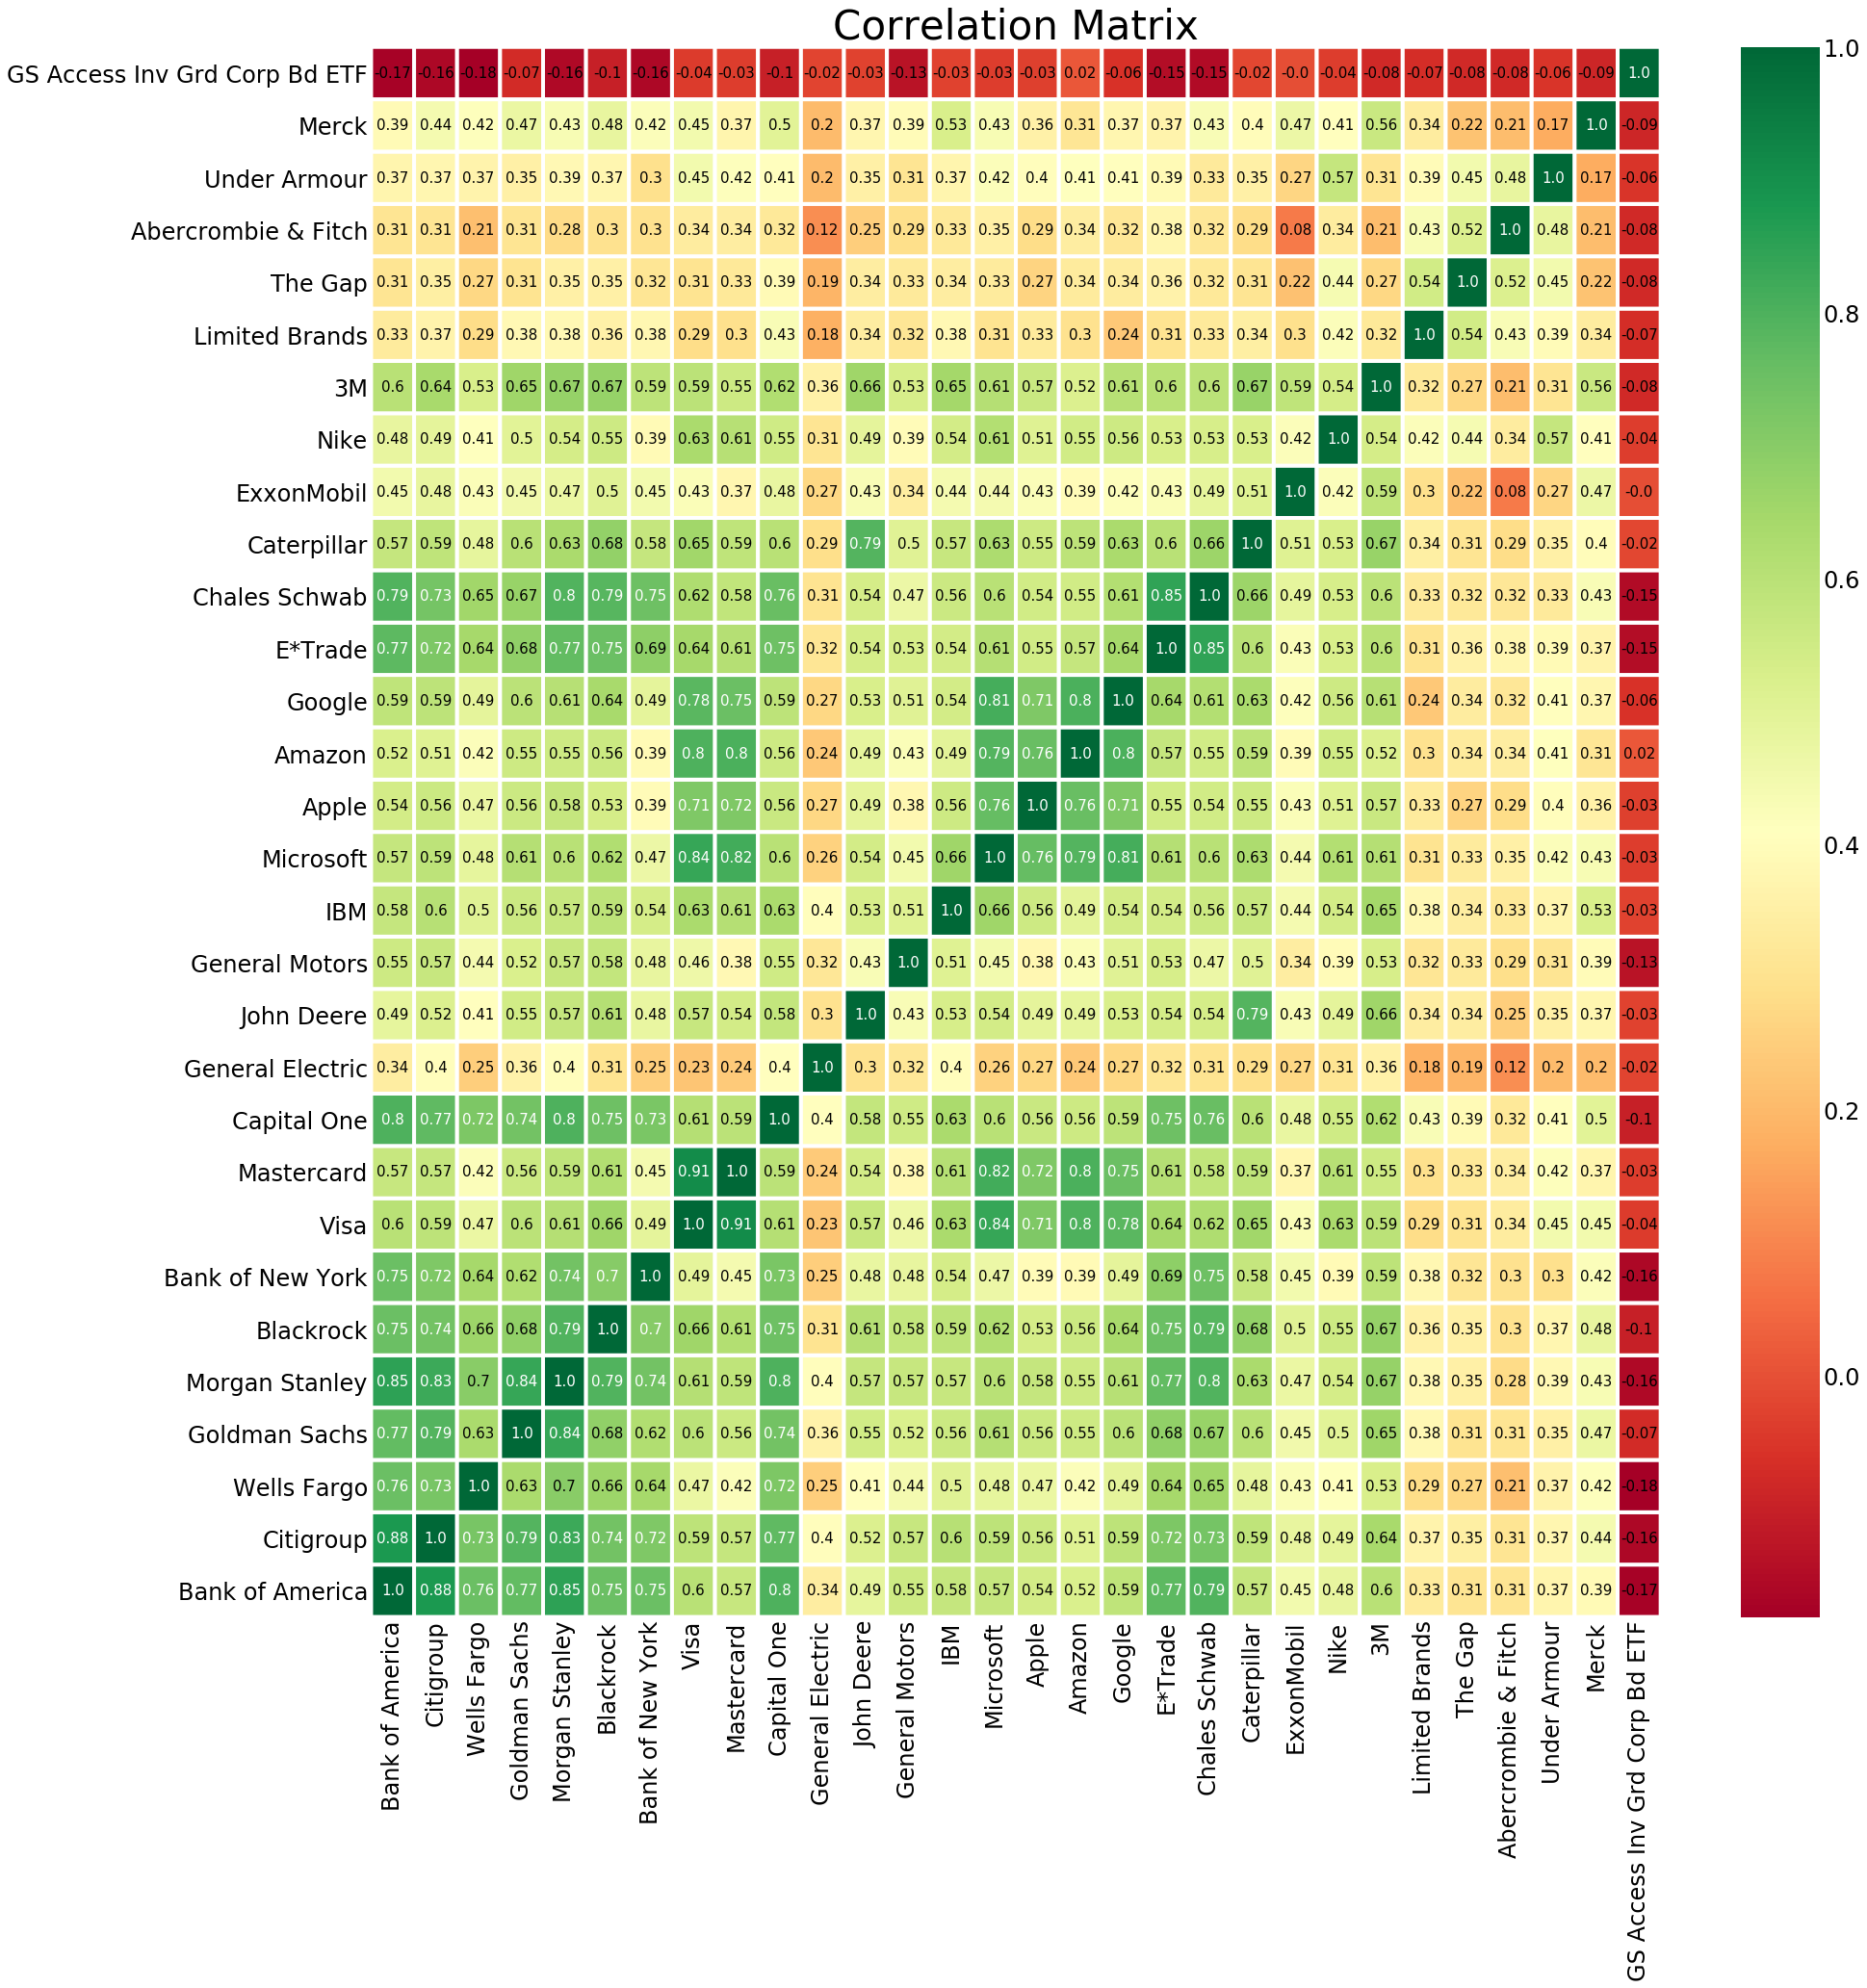

In [16]:
#heatmap 1
plot.figure(figsize=(30,30))
heatmap = plot.pcolor(corrmatrix, edgecolors ='white', linewidth=4, cmap='RdYlGn')
for y in range(len(corrmatrix)):
    for x in range(len(corrmatrix)):
        value = corrmatrix.iloc[y].iloc[x]
        color = 'white' if value > 0.7 else 'black'
        plot.text(x + 0.5, y + 0.5, round(value,2),
                    horizontalalignment = 'center',
                    verticalalignment= 'center', fontsize= 15, color=color)

#setting the axis off           
plot.box(False)
tick_locations = [x + 0.5 for x in range(len(corrmatrix))]

#labeling the chart
plot.gca().tick_params(axis=u'both', which=u'both',length=0)
plot.gca().set_xticks(tick_locations)
plot.gca().set_yticks(tick_locations)
plot.gca().set_yticklabels(corrmatrix.index.values, fontsize=24)
plot.gca().set_xticklabels(corrmatrix.index.values, rotation='vertical',fontsize=24)
plot.title("Correlation Matrix", fontsize =42)
cb = plot.colorbar(heatmap, drawedges=False)
cb.outline.set_linewidth(0)
cb.ax.tick_params(labelsize = 24, length=0)

In [17]:
#heatmap 2 - Point the cursor at specific tile to view the correlation coefficient
layout = grph.Layout(dict(title = "Correlation Matrix for Stocks",
                        autosize = True,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

matrix_cols = corrmatrix.columns.tolist()
corr_array  = np.array(corrmatrix)
trace = grph.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )
##trace = grph.Heatmap(z=corrmatrix)
data = [trace]
figure = grph.Figure(data=data,layout=layout)
py.iplot(figure)

## Regression analysis for V and MA (most directly correlated pair)

### Taking V as the dependent and MA as the independent variable

In [18]:
# change dataframes to arrays
x=df_delta[dir_stock1].values #Visa - Dependent
y=df_delta[dir_stock2].values #Mastercard - Independent
x = x.reshape(251,1)
y = y.reshape(251,1)

# regression
regress = linear_model.LinearRegression()
regress.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#intercept
a = regress.intercept_

#slope
b = regress.coef_

#R-squared
score = regress.score(x,y)

#Mean Squared Error(for V as dependent variable)
from sklearn.metrics import mean_squared_error
error = mean_squared_error(x, regress.predict(x))

# print the regression equation
print("The regression equation is y =",a," + ",b,"x")
print("The intercept is",a)
print("The coefficient is",b)
print("The R-squared is",score)

The regression equation is y = [0.00037192]  +  [[1.03802986]] x
The intercept is [0.00037192]
The coefficient is [[1.03802986]]
The R-squared is 0.8316216841815536


### Graph the Regression

Text(0, 0.5, '%Daily change of Mastercard - Independent')

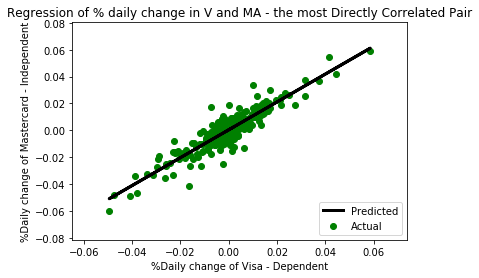

In [20]:
plot.scatter(x,y,color='green', label = "Actual") # % daily changes for V and MA
plot.plot(x,regress.predict(x), color='black', linewidth=3, label = "Predicted") # for V as dependent
plot.legend(loc="lower right")

#set the scale
plot.rcParams["figure.figsize"] = [15, 6.0]

#Title and Axis Lables are added
plot.title("Regression of % daily change in V and MA - the most Directly Correlated Pair")
plot.xlabel("%Daily change of Visa - Dependent")
plot.ylabel("%Daily change of Mastercard - Independent")   

### Results from the Regression

In [21]:
print("The y intercept for daily change% for V and MA is, ",a)
print("The slope of the regression for daily change% for V and MA is, ",b)
print("The Rsquared for daily change% for V and MA is, ",score)
print("The mean squared error for V - dependent is, ",error)

The y intercept for daily change% for V and MA is,  [0.00037192]
The slope of the regression for daily change% for V and MA is,  [[1.03802986]]
The Rsquared for daily change% for V and MA is,  0.8316216841815536
The mean squared error for V - dependent is,  4.1296541519194695e-07


### Regression analysis for WFC and GIGB (most inversely correlated pair)

### Taking WFC as dependent and GIGB as independent variable

In [22]:
x1=df_delta[inv_stock1].values # WFC - dependent
y1=df_delta[inv_stock2].values # GIGB - independent
x1 = x1.reshape(251,1)
y1 = y1.reshape(251,1)

# regression
regress1 = linear_model.LinearRegression()
regress1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# intercept
a1 = regress1.intercept_

# coefficient
b1 = regress1.coef_

# R-squared
score1 = regress1.score(x1,y1)

#Mean Squared Error(for WFC as dependent variable)
error1 = mean_squared_error(x1, regress1.predict(x1))

# print the regression equation
print("The regression equation is y =",a1," + ",b1,"x")
print("The intercept is",a1)
print("The coefficient is",b1)
print("The R-squared is",score1)

The regression equation is y = [-0.00032462]  +  [[-0.02350817]] x
The intercept is [-0.00032462]
The coefficient is [[-0.02350817]]
The R-squared is 0.032793712414711296


### Graph the regression

Text(0, 0.5, 'Daily change of GS Access Inv Grd Corp Bd ETF - independent')

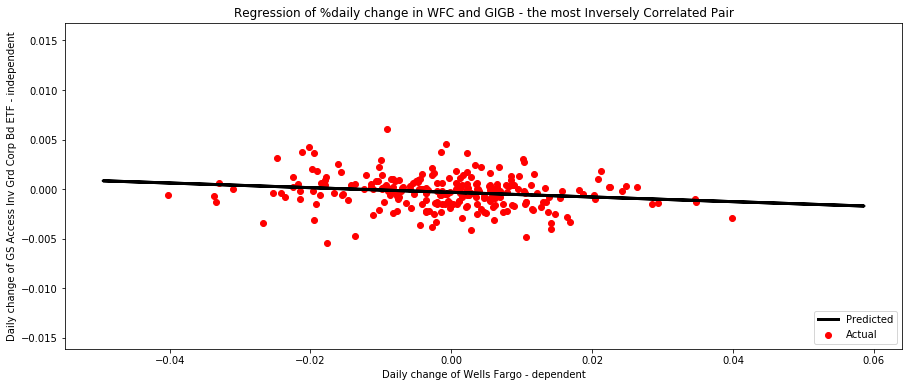

In [24]:
plot.scatter(x1,y1,color='red', label = "Actual") # % daily change for WFC and GIGB
plot.plot(x,regress1.predict(x), color='black', linewidth=3, label = "Predicted") # for WFC as dependent
plot.legend(loc="lower right")

#set the scale
plot.rcParams["figure.figsize"] = [15, 6.0]

#Title and Axis Lables are added
plot.title("Regression of %daily change in WFC and GIGB - the most Inversely Correlated Pair")
plot.xlabel("Daily change of Wells Fargo - dependent")
plot.ylabel("Daily change of GS Access Inv Grd Corp Bd ETF - independent")

In [25]:
print("The y intercept for daily change% for WFC and GIGB is, ",a1)
print("The slope of the regression for daily change% for for WFC and GIGB is, ",b1)
print("The Rsquared for daily change% for WFC and GIGB is, ",score1)
print("The mean squared error for WFC - dependent is, ",error1)

The y intercept for daily change% for WFC and GIGB is,  [-0.00032462]
The slope of the regression for daily change% for for WFC and GIGB is,  [[-0.02350817]]
The Rsquared for daily change% for WFC and GIGB is,  0.032793712414711296
The mean squared error for WFC - dependent is,  0.0001665102377144904


## Regression model evaluation with Last week's Closing Prices

### Getting last week's (12/9/2019 Monday - 12/13/2019 Friday) prices of V, MA, WFC, and GIGB for comparison analysis

In [26]:
start_date_current = dt.datetime(2019,12,9)
end_date_current = dt.datetime(2019,12,13)
dict_stocks_current = {
              'Wells Fargo': pdr.DataReader('WFC', 'yahoo', start_date_current, end_date_current),
              'Visa':pdr.DataReader('V', 'yahoo', start_date_current, end_date_current), 
              'Mastercard': pdr.DataReader('MA', 'yahoo', start_date_current, end_date_current),
              'GS Access Inv Grd Corp Bd ETF': pdr.DataReader('GIGB', 'yahoo', start_date_current, end_date_current), 
              }
dict_stocks_current

{'Wells Fargo':                  High        Low       Open      Close    Volume  Adj Close
 Date                                                                       
 2019-12-09  54.549999  53.910000  54.169998  53.919998  15070800  53.919998
 2019-12-10  53.869999  53.380001  53.490002  53.689999  15959100  53.689999
 2019-12-11  53.980000  53.070000  53.740002  53.169998  16834200  53.169998
 2019-12-12  54.549999  53.099998  53.369999  54.360001  19119500  54.360001
 2019-12-13  54.419998  53.430000  54.049999  53.790001  19179300  53.790001,
 'Visa':                   High         Low        Open       Close    Volume  \
 Date                                                                   
 2019-12-09  183.259995  181.300003  181.899994  182.919998  10233100   
 2019-12-10  183.149994  181.899994  182.550003  182.259995   8625700   
 2019-12-11  183.080002  181.190002  183.070007  182.009995   7138800   
 2019-12-12  183.330002  180.830002  181.660004  182.639999  11192100   

### Convert last week's daily changes for V,MA, WFC, and GIGB to dataframes

In [27]:
df_delta_current = pd.DataFrame()
for i in dict_stocks_current:
    df_delta_current[i] = (dict_stocks_current[i].Close - dict_stocks_current[i].Open)/dict_stocks_current[i].Open
df_delta_current

,Wells Fargo,Visa,Mastercard,GS Access Inv Grd Corp Bd ETF
Date,,,,
2019-12-09,-0.004615,0.005608,-0.000450,-0.001938
2019-12-10,0.003739,-0.001589,-0.001350,0.001067
2019-12-11,-0.010607,-0.005790,0.001001,0.003044
2019-12-12,0.018550,0.005395,0.007968,-0.003804
2019-12-13,-0.004810,0.014466,0.018226,0.003044


## Evaluate last week's (12/9/2019-12/13/2019) % daily change with the correlation of historic (1/1/2018-12/31/2018) % daily change of most directly related pair (V and MA)

In [28]:
# change current dataframes to arrays
x_current=df_delta_current["Visa"].values # Visa - Dependent
y_current=df_delta_current["Mastercard"].values # Mastercard - Independent
x_current = x_current.reshape(5,1)
y_current = y_current.reshape(5,1)

# change historic dataframes to arrays
x=df_delta["Visa"].values # Visa - Dependent
y=df_delta["Mastercard"].values # Mastercard - Independent
x = x.reshape(251,1)
y = y.reshape(251,1)

# regression of historic % daily change in V and MA
from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit(x,y)
a = regress.intercept_
b = regress.coef_
score = regress.score(x,y)

# print the regression equation
print("The regression equation is y =",a," + ",b,"x")
print("The intercept is",a)
print("The coefficient is",b)
print("The R-squared is",score)

The regression equation is y = [0.00037192]  +  [[1.03802986]] x
The intercept is [0.00037192]
The coefficient is [[1.03802986]]
The R-squared is 0.8316216841815536


Text(0, 0.5, 'Mastercard % daily change')

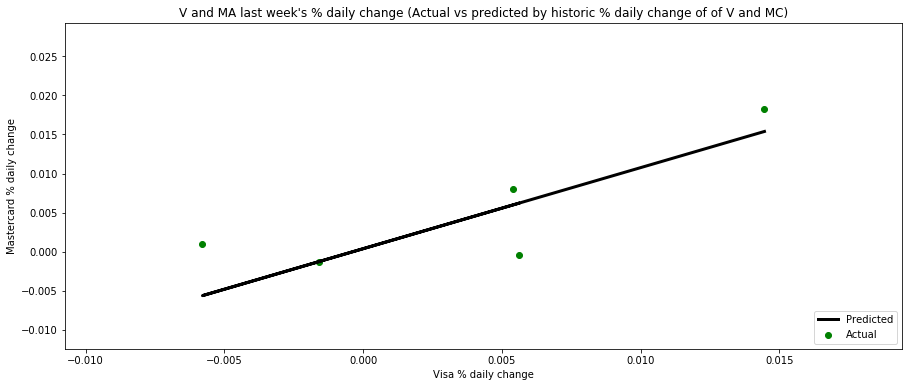

In [29]:
# plot the last week's %daily changes in price for V and MA on the regression line predicted by -
# the regression equation of historic %daily changes in V and MA (most directly correlated stocks)

plot.scatter(x_current,y_current,color='green', label = 'Actual') # % daily change for V and MA from 12/9/2019 - 12/13/2019
plot.plot(x_current,regress.predict(x_current), color='black', linewidth=3, label = 'Predicted') # % daily change in V predicted by regression
plot.legend(loc = 'lower right')

#set the scale
plot.rcParams["figure.figsize"] = [15, 6.0]

#Title and Axis Lables are added
plot.title("V and MA last week's % daily change (Actual vs predicted by historic % daily change of of V and MC)")
plot.xlabel("Visa % daily change")
plot.ylabel("Mastercard % daily change")

In [30]:
# MSE for last week's Visa %daily change and prediction by regression of historic (V and MA %daily change)
error_current = mean_squared_error(x_current, regress.predict(x_current))
print("MSE is:",error_current)

MSE is: 3.291390512583535e-07


## Evaluate last week's (12/9/2019-12/13/2019) % daily change with the correlation of historic (1/1/2018-12/31/2018) % daily change of most inversely related pair (WFC and GIGB)

In [31]:
# change current dataframes to arrays
x1_current=df_delta_current["Wells Fargo"].values # Wells Fargo - Dependent
y1_current=df_delta_current["GS Access Inv Grd Corp Bd ETF"].values # GS Access Inv Grd Corp Bd ETF - Independent
x1_current = x_current.reshape(5,1)
y1_current = y_current.reshape(5,1)

# change historic dataframes to arrays
x1=df_delta["Wells Fargo"].values # Wells Fargo - Dependent
y1=df_delta["GS Access Inv Grd Corp Bd ETF"].values # GS Access Inv Grd Corp Bd ETF - Independent
x1 = x1.reshape(251,1)
y1 = y1.reshape(251,1)

# regression of historic % daily change in WFC and GIGB
from sklearn import linear_model
regress1 = linear_model.LinearRegression()
regress1.fit(x1,y1)
a1 = regress1.intercept_
b1 = regress1.coef_
score1 = regress1.score(x1,y1)

# print the regression equation
print("The regression equation is y =",a1," + ",b1,"x")
print("The intercept is",a1)
print("The coefficient is",b1)
print("The R-squared is",score1)

The regression equation is y = [-0.00032462]  +  [[-0.02350817]] x
The intercept is [-0.00032462]
The coefficient is [[-0.02350817]]
The R-squared is 0.032793712414711296


Text(0, 0.5, 'GIGB % daily change')

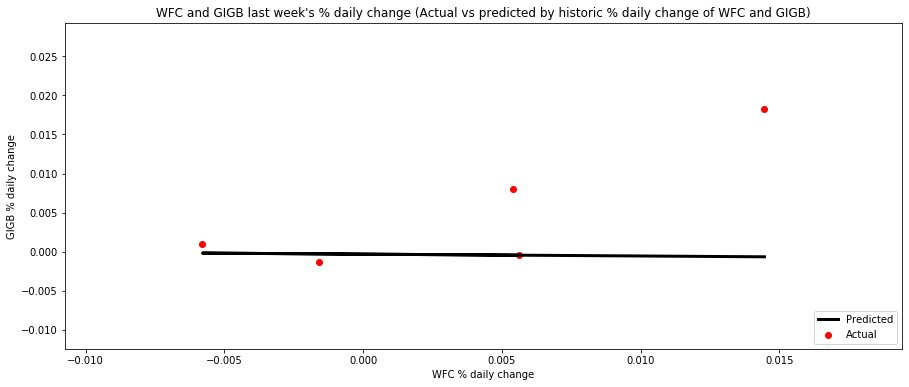

In [32]:
# plot the last week's %daily changes in price for WFC and GIGB on the regression line predicted by -
# the regression equation of historic %daily changes in WFC and GIGB (most inversely correlated stocks)

plot.scatter(x1_current,y1_current,color='red', label = 'Actual') # % daily change for WFC and GIGB from 12/9/2019 - 12/13/2019
plot.plot(x1_current,regress1.predict(x1_current), color='black', linewidth=3, label = 'Predicted') # % daily change in WFC predicted by regression
plot.legend(loc = 'lower right')

#set the scale
plot.rcParams["figure.figsize"] = [15, 6.0]

#Title and Axis Lables are added
plot.title("WFC and GIGB last week's % daily change (Actual vs predicted by historic % daily change of WFC and GIGB)")
plot.xlabel("WFC % daily change")
plot.ylabel("GIGB % daily change")

In [33]:
# MSE for last week's WFC %daily change and prediction by regression of historic (WFC and GIGB %daily change)
error1_current = mean_squared_error(x1_current, regress1.predict(x1_current))
print("MSE is:",error1_current)

MSE is: 6.659018917530517e-05
